# **Uncovering Retail Patterns: An Exploratory Analysis of Sales and Customer Demographics**

## **1. Introduction**

> “Every transaction is more than just a number — it’s a reflection of human behavior, preferences, and moments in time.”

In this exploratory data analysis (EDA), we dive into a **synthetic retail dataset** that mimics real-world shopping behavior. Each row in the data captures a moment when a customer made a purchase: what they bought, how much they spent, and who they are demographically. Our task is to step into the shoes of a retail analyst and **uncover the hidden stories** within this data.

### **The Purpose of This EDA**

This notebook focuses on **exploration, visualization, and insight generation** — no machine learning, no modeling. Our goals:

* Get a feel for the structure and quality of the data.
* Examine patterns across **time**, **demographics**, and **products**.
* Translate raw data into **business-ready narratives** and **visual discoveries**.

By the end of this notebook, we aim to craft a set of insights that a business stakeholder could act on — whether it’s targeting a specific customer segment, adjusting inventory, or planning a seasonal campaign.

### **What’s Ahead**

Here’s a glimpse of the journey:

1. **Preview the dataset** — What do we have, and what do we need to clean or engineer?
2. **Explore customer demographics** — Who’s shopping?
3. **Uncover time-based patterns** — When are people buying?
4. **Analyze products and sales behavior** — What sells, and how?
5. **Summarize business insights** — What actions could a retailer take?

---

> Let’s begin by taking a quick look at the data — just enough to get our bearings before diving deeper.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **2. Dataset Preview**

Before diving deep, let’s take a glance at the lay of the land.

In [2]:
df = pd.read_csv("../data/retail_sales_dataset.csv", encoding= 'utf-8')

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.shape

(1000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## **3. Data Cleaning & Preparation**

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# df['Year Month'] = df['Date'].dt.to_period('M')

In [10]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [11]:
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
290,291,2023-01-08,CUST291,Male,60,Clothing,2,300,600
370,371,2023-02-21,CUST371,Female,20,Beauty,1,25,25
835,836,2023-04-19,CUST836,Female,22,Clothing,1,50,50
684,685,2023-06-02,CUST685,Male,57,Electronics,2,25,50
768,769,2023-06-09,CUST769,Female,31,Electronics,4,30,120


In [12]:
print(f"Date range: {min(df['Date'])} - {max(df['Date'])}")

Date range: 2023-01-01 00:00:00 - 2024-01-01 00:00:00


## **4. Exploratory Data Analysis**

### **4.1 Univariate Exploration**

We begin by looking at each variable one at a time, getting to know the individual components that make up our retail world

#### **Age Distribution** - Who shops?

* What’s the age range of customers?
* Are we seeing mostly younger shoppers, or is the audience more diverse?
* Any surprising gaps or spikes?

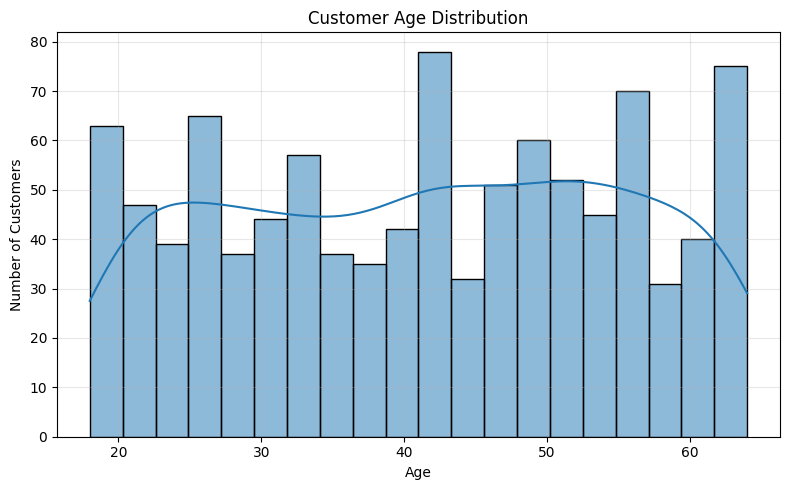

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

> The age range in this dataset spans from 18 to 64. The ages are well spread out with no single age group dominating, which suggests a diverse customer base. The KDE curve indicates two slight peaks — one around the early 20s and another between the 40s and 50s — but there are no surprising gaps or spikes in the distribution.

#### **Gender Breakdown** — Who Shops More?

* How is the gender distribution across transactions?
* Does one gender dominate, or is it balanced?

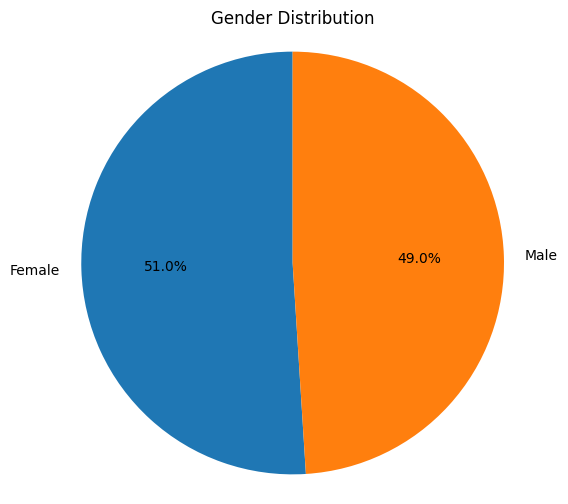

In [14]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

> The gender distribution is nearly equal between males and females, with females slightly edging out males at 51% to 49%. Overall, it is a well-balanced demographic.

#### **Product Categories** — What Gets Bought?

* Which product categories are most frequently purchased?
* Are some categories surprisingly rare?

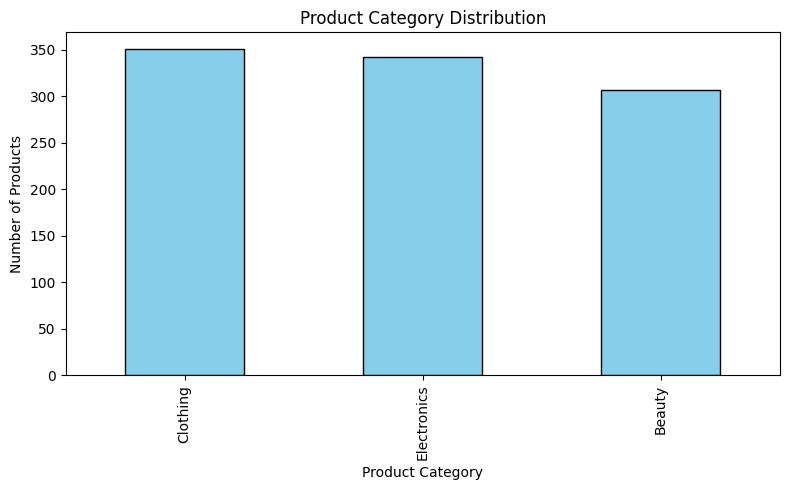

In [15]:
category_counts = df['Product Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar',color='skyblue', edgecolor='black')
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()

> Clothing products are the most frequently purchased among the product categories. Overall, the categories are fairly comparable in frequency, with Beauty products being the least purchased and Electronics coming in second.

#### **Transaction Totals** — What’s the Usual Spending?

* What’s the typical total amount per transaction?
* Are most transactions small or large?

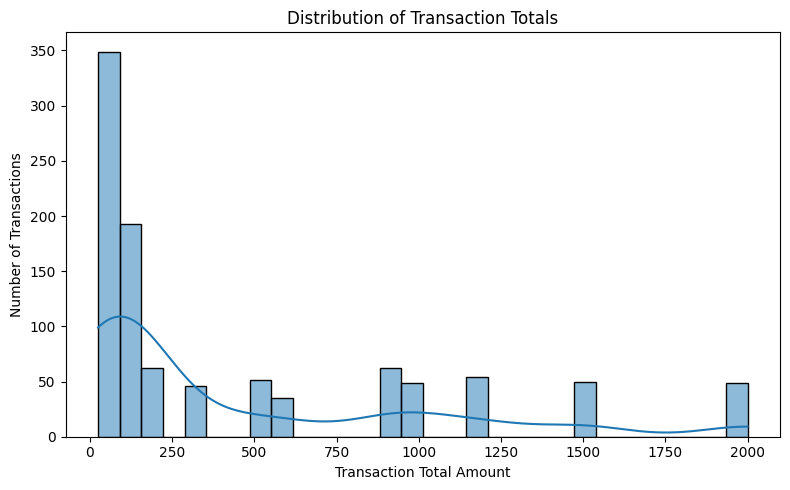

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Totals")
plt.xlabel("Transaction Total Amount")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

In [17]:
print(f"Average total amount: R{df['Total Amount'].mean()}")

Average total amount: R456.0


> The typical total amount per transaction falls between **R10 and R200**, indicating that most transactions are relatively small. However, there are a few **large outliers** that skew the distribution to the right. The average transaction total is **R456**, which is higher than the typical range due to these high-value purchases.

#### **Quantity & Unit Price** — Buying Patterns?

* Are customers buying in bulk or small amounts?
* Are most products low-priced or premium?

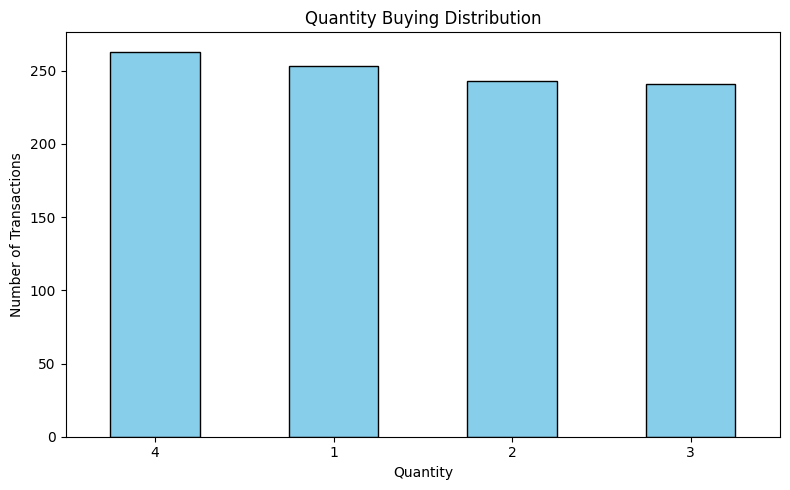

In [18]:
quantity_counts = df['Quantity'].value_counts()

plt.figure(figsize=(8, 5))
quantity_counts.plot(kind='bar',color='skyblue', edgecolor='black')
plt.title("Quantity Buying Distribution")
plt.xlabel("Quantity")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

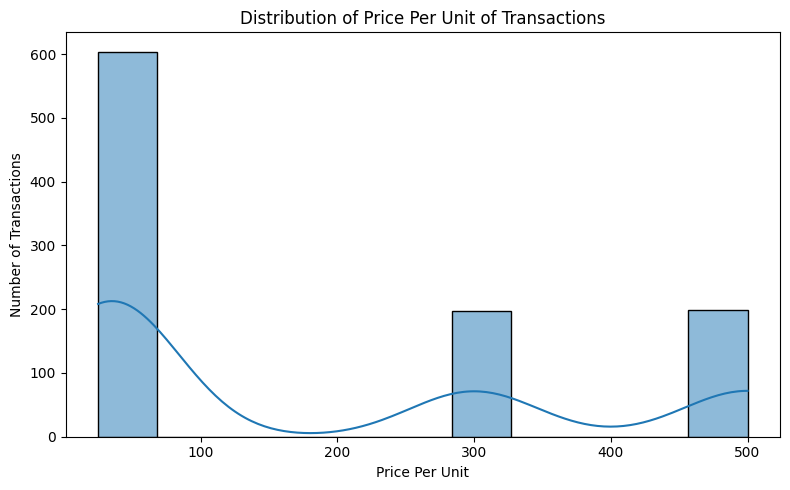

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price per Unit'], kde=True)
plt.title("Distribution of Price Per Unit of Transactions")
plt.xlabel("Price Per Unit")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

> The quantity of items per transaction is fairly evenly distributed across different values. A quantity of **4 items** is the most common, closely followed by single-item purchases, indicating that customers tend to buy in small but varied amounts. Additionally, **about 60% of the products are low-priced (per unit)**, while the remaining **40% fall into the higher-end or premium category**, suggesting a mixed pricing strategy in the product lineup.

### **4.2 Business Questions**

> Now that we know who our customers are and what they’re buying, let’s see how they behave and why.


#### **Q1: How does customer age and gender influence their purchasing behavior?**

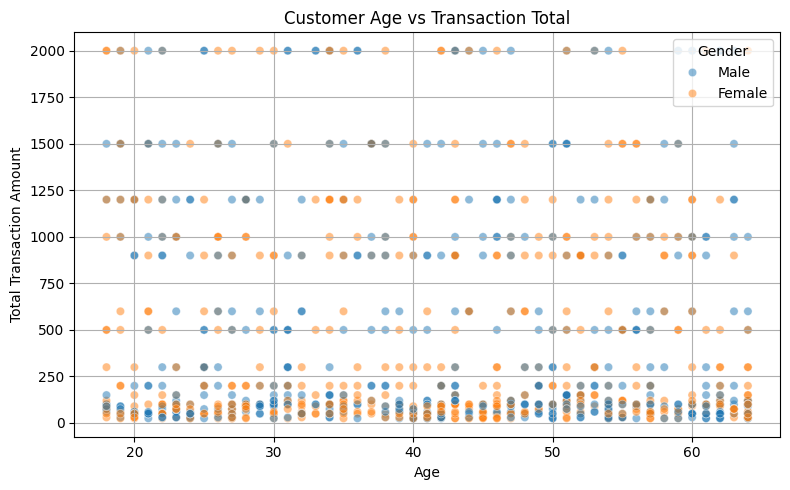

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['Total Amount'],hue=df['Gender'], alpha=0.5)
plt.title("Customer Age vs Transaction Total")
plt.xlabel("Age")
plt.ylabel("Total Transaction Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print(f"The correlation between age and total transaction amount is {df['Age'].corr(df['Total Amount'])}")

The correlation between age and total transaction amount is -0.0605680238830457


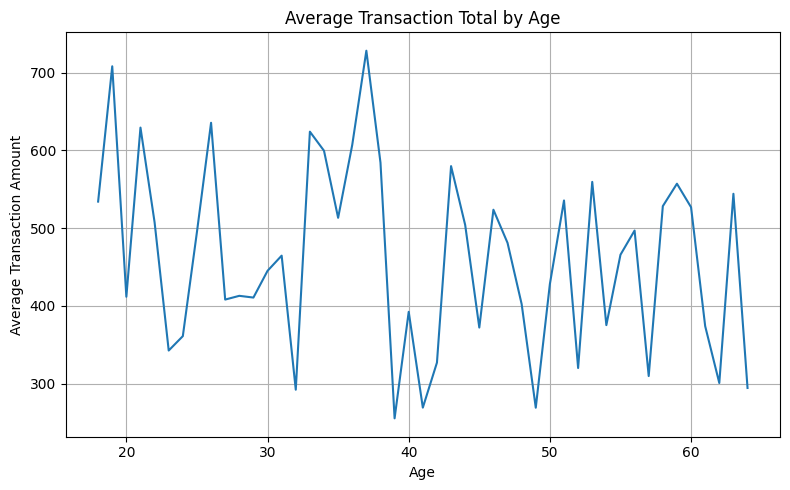

In [22]:
age_avg = df.groupby('Age')['Total Amount'].mean()

plt.figure(figsize=(8,5))
age_avg.plot(kind='line')
plt.title("Average Transaction Total by Age")
plt.xlabel("Age")
plt.ylabel("Average Transaction Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

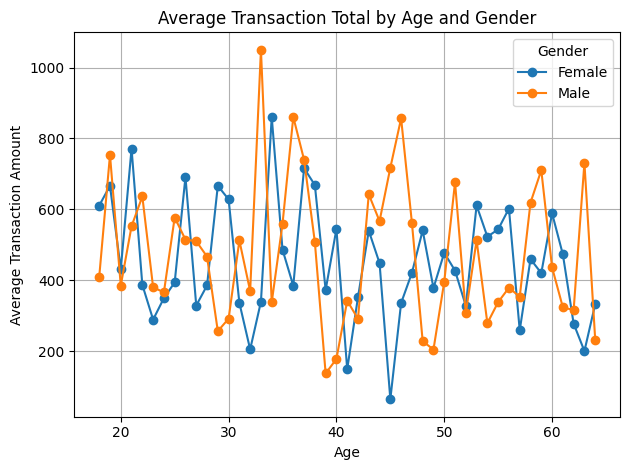

In [23]:
gender_avg = df.groupby(['Age','Gender'])['Total Amount'].mean().unstack()

plt.figure(figsize=(10,6))
gender_avg.plot(kind='line', marker='o') 
plt.title("Average Transaction Total by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Average Transaction Amount")
plt.grid(True)
plt.tight_layout()
plt.legend(title='Gender')
plt.show()

> **There is no strong relationship between age and customer spending, and gender-based differences appear minimal.** A scatter plot of all transactions shows a weak correlation between age and total spending (r ≈ -0.06), with no discernible pattern.
A line chart of **average transaction totals by age** reveals some variation, with spending spikes at specific ages (e.g., late teens, mid-30s, early 60s), but no consistent upward or downward trend.
> 
> When broken down by **gender and age**, the trends remain irregular. While some age groups show slight differences between male and female spending, there is **no clear dominance** of one gender across the age range.
> 
>Overall, purchasing behavior appears **relatively balanced across both age and gender**, with no strong patterns that would suggest targeted marketing based solely on these demographics.

#### **Q2: Are there discernible patterns in sales across different time periods?**

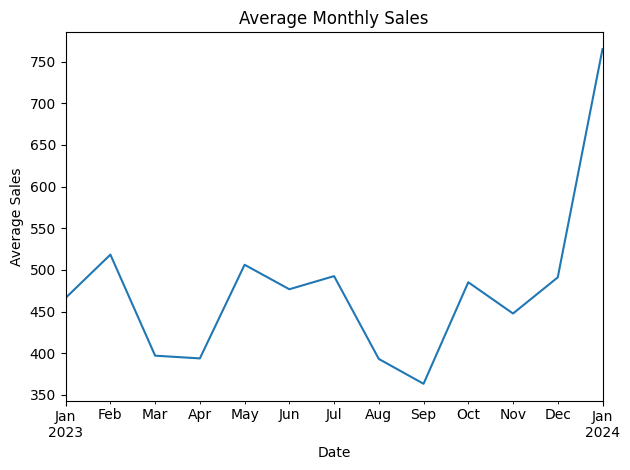

In [24]:
temp_df = df.copy()
temp_df.set_index('Date', inplace=True)
monthly_sales = temp_df['Total Amount'].resample('ME').mean()
monthly_sales.plot(kind='line')
plt.title("Average Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

In [25]:
temp_df.sort_values('Date').tail()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-12-29,233,CUST233,Female,51,Beauty,2,300,600
2023-12-29,805,CUST805,Female,30,Beauty,3,500,1500
2023-12-31,857,CUST857,Male,60,Electronics,2,25,50
2024-01-01,211,CUST211,Male,42,Beauty,3,500,1500
2024-01-01,650,CUST650,Male,55,Electronics,1,30,30


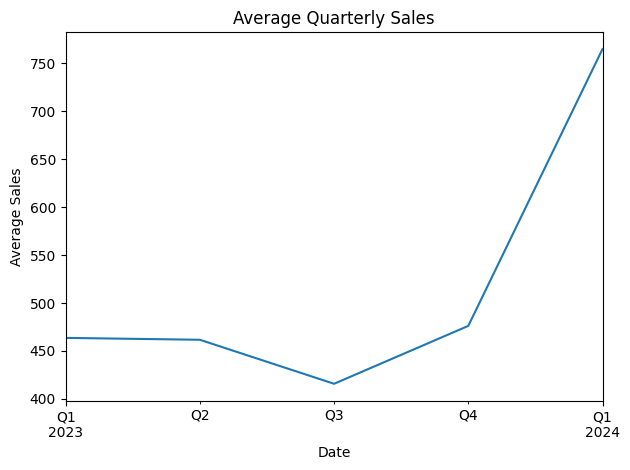

In [26]:
monthly_sales = temp_df['Total Amount'].resample('QE').mean()
monthly_sales.plot(kind='line')
plt.title("Average Quarterly Sales")
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


> **Sales remained relatively stable throughout the year, with moderate fluctuations but no strong seasonal pattern.**
> The monthly sales trend shows minor dips in **March, August, and September**, with slight rebounds in the following months. Although **January 2024** displays a sharp spike in average sales, this is due to **only two transactions** (one unusually high), and therefore should be considered an outlier rather than a true trend.
>
> The quarterly chart reflects this stability more clearly, with **Q3 (Jul–Sep)** showing the lowest performance, and **Q4 (Oct–Dec)** showing modest recovery.
>
> Overall, sales do not follow a strong seasonal or time-based pattern, and average performance appears relatively balanced across most months.


#### **Q3: Which product categories hold the highest appeal among customers?**

In [27]:
summary = df.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum',
    'Price per Unit': 'mean'
}).sort_values('Total Amount',ascending=False).reset_index()

summary.columns = ['Product Category', 'Total Amount', 'Total Quantity', 'Avg Price per Unit']

summary = summary.round(2).sort_values(by='Total Amount', ascending=False)

summary.style.format({
    'Total Amount': 'R{:.2f}',
    'Total Quantity': '{:.0f}',
    'Avg Price per Unit': 'R{:.2f}'
}).set_caption("Sales Summary by Product Category")

,Product Category,Total Amount,Total Quantity,Avg Price per Unit
0,Electronics,R156905.00,849,R181.90
1,Clothing,R155580.00,894,R174.29
2,Beauty,R143515.00,771,R184.06


In [28]:
category_counts

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

> **Clothing holds the highest appeal among customers**, with the highest number of units sold and the most orders, indicating strong and consistent customer interest. While **Electronics** generates slightly more revenue due to higher-priced items, and **Beauty** appeals to a smaller segment willing to pay more per unit, **Clothing** stands out as the most popular category overall.

#### **Q4: What are the relationships between age, spending, and product preferences?**

<Figure size 1200x800 with 0 Axes>

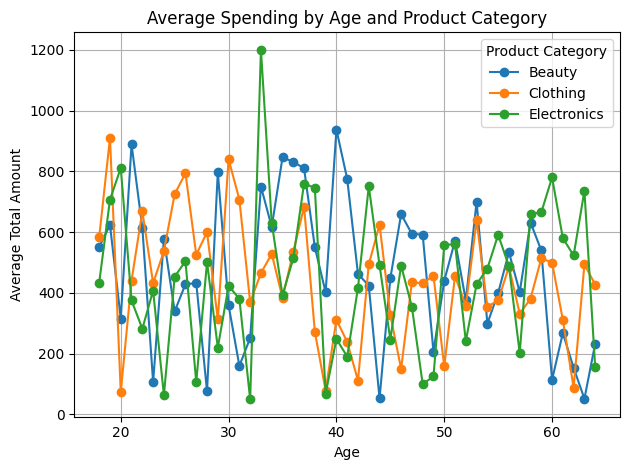

In [29]:
age_pref = df.groupby(['Age', 'Product Category'])['Total Amount'].mean().unstack()

plt.figure(figsize=(12,8))
age_pref.plot(marker='o')
plt.title("Average Spending by Age and Product Category")
plt.ylabel("Average Total Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

> **Spending habits and product preferences vary slightly across age groups, but no strong pattern emerges.**
> While some age groups (e.g., customers in their 30s or 60s) show slightly higher average spending, the relationship between age and total spending remains weak overall.
>
> When broken down by product category, **Electronics** tends to attract higher spending across most ages, possibly due to higher price per unit. **Clothing** shows relatively consistent spending across age groups, suggesting broad appeal. **Beauty products** see moderate spending, possibly concentrated in specific age ranges (e.g., younger adults).
>
> Overall, while age slightly influences category preferences, **no single age group dominates in spending or product choice**, suggesting that **product demand is fairly evenly distributed** across age demographics.


#### **Q5: How do customers adapt their shopping habits during seasonal trends?**

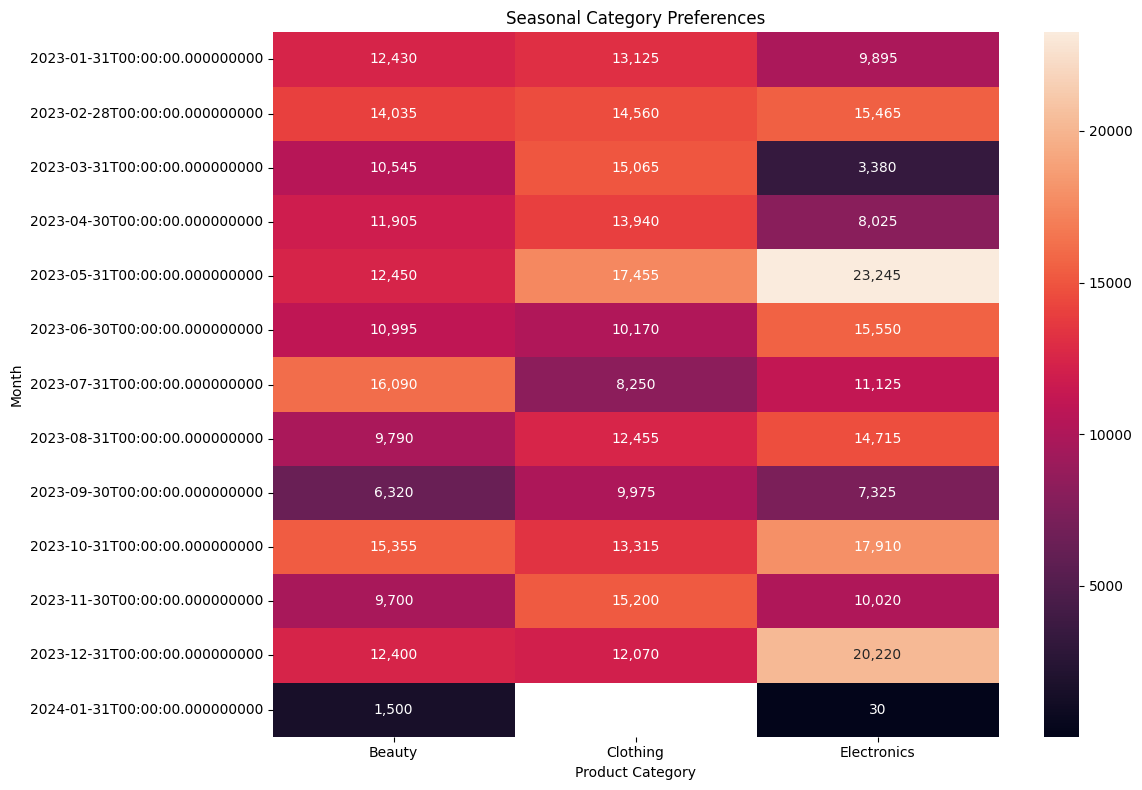

In [30]:
monthly_cat = temp_df.groupby('Product Category').resample('ME')['Total Amount'].sum()

monthly_pivot = monthly_cat.reset_index().pivot(index='Date', columns='Product Category', values='Total Amount')

plt.figure(figsize=(12,8))
sns.heatmap(monthly_pivot, annot=True, fmt=',.0f')
plt.title('Seasonal Category Preferences')
plt.ylabel('Month')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

/tmp/ipykernel_12230/2128520600.py:1: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_cat_freq = temp_df.groupby('Product Category').resample('ME').size()


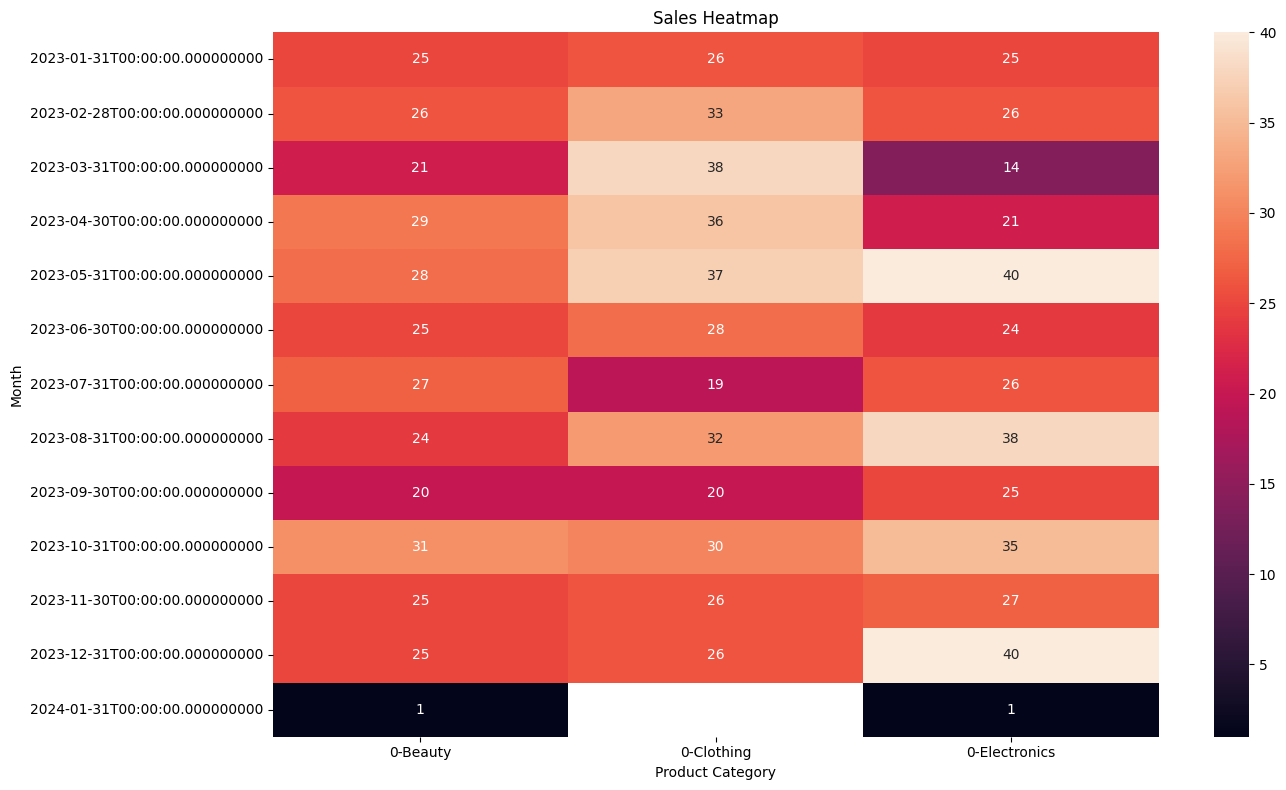

In [31]:
monthly_cat_freq = temp_df.groupby('Product Category').resample('ME').size()
heatmap = monthly_cat_freq.reset_index().pivot(index='Date', columns='Product Category')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

> This dataset was uploaded by Mohammad Talib, who is based in India. Therefore, the following assumptions are contextualized within the Indian seasonal and cultural landscape.
>
> The heatmap reveals distinct seasonal adaptations across product categories, highlighting how consumer spending shifts in response to weather, festivals, and cultural events.
>
> * **Beauty** peaks in **July**, likely driven by demand for anti-humidity products and sun protection during the peak of summer. A second spike in **October** may align with the **festive and wedding season**, when grooming and personal care gain prominence.
>
> * **Clothing** sees higher spending in **May**, suggesting consumers are refreshing their wardrobes ahead of summer. A notable dip in **July** reflects the **Monsoon season**, which may suppress apparel purchases due to rain-related disruptions and travel constraints.
>
> * **Electronics** show sharp demand in **May**, potentially due to purchases of cooling appliances like fans and air conditioners. Surges in **October** and **December** suggest festive gifting (Diwali, weddings) and year-end holiday promotions.
>
> It's worth noting that **2024 data includes only two records** and may not provide reliable insights. These values should be treated as outliers for seasonal trend analysis.


#### **Q6: Are there distinct purchasing behaviors based on the number of items bought?**

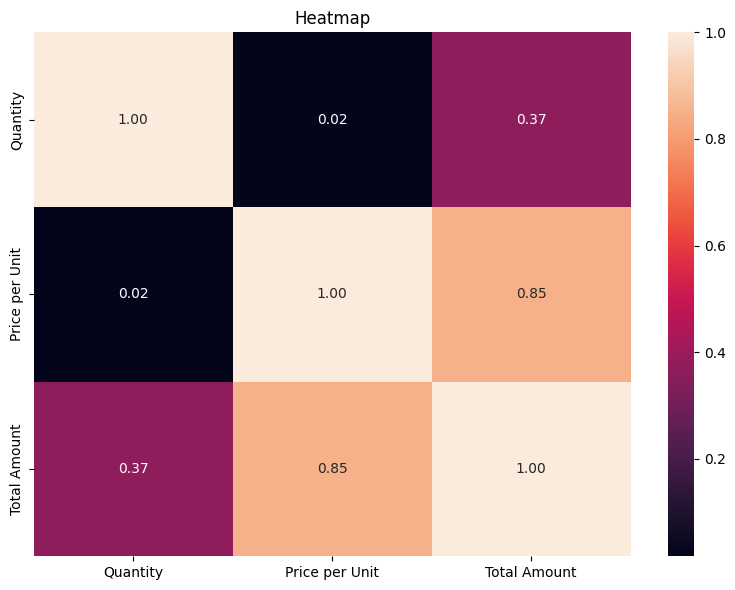

In [32]:
corr_columns = df[['Quantity', 'Price per Unit','Total Amount']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_columns,annot=True, fmt='.2f')
plt.title('Heatmap')
plt.tight_layout()
plt.show()

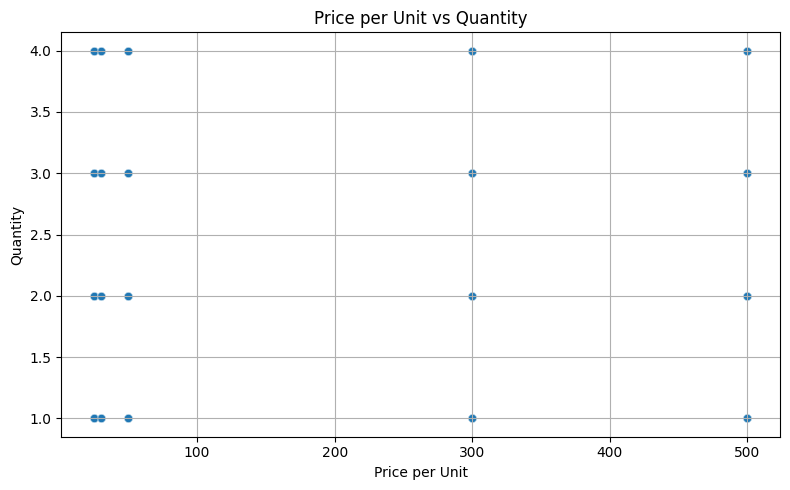

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price per Unit'], y=df['Quantity'], alpha=0.5)
plt.title("Price per Unit vs Quantity")
plt.xlabel("Price per Unit")
plt.ylabel("Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

> There appear to be **no distinct purchasing behaviors based on quantity**. The scatter plot of **Price per Unit vs Quantity** shows a balanced distribution across different price levels, indicating that customers who purchase more items don't consistently opt for cheaper or more expensive products.
>
> This is supported by the **very low correlation (0.02)** between quantity and price per unit. Additionally, the **weak correlation (0.37)** between quantity and total amount suggests that while buying more items slightly increases spending, it’s not a strong trend.
>
> Overall, customer purchasing behavior seems **consistent regardless of the number of items bought**, with **price per unit** being the stronger driver of total spend.


#### **Q7: What insights can be gleaned from the distribution of product prices within each category?**

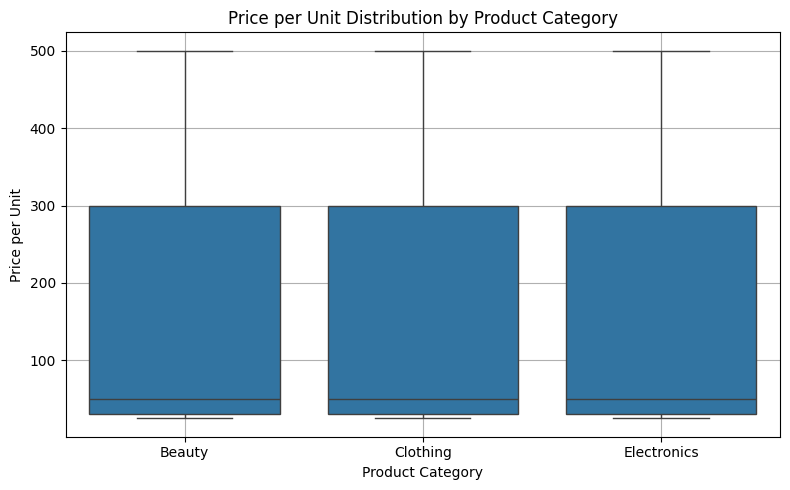

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Product Category', y='Price per Unit', data=df)
plt.title("Price per Unit Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Price per Unit")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
df.groupby('Product Category')['Price per Unit'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Product Category,,,,,,,,
Beauty,307.0,184.06,194.93,25.0,30.0,50.0,300.0,500.0
Clothing,351.0,174.29,186.02,25.0,30.0,50.0,300.0,500.0
Electronics,342.0,181.90,189.05,25.0,30.0,50.0,300.0,500.0


> The **boxplot** and **descriptive statistics table** reveal a strikingly consistent pricing structure across all three product categories — **Beauty**, **Clothing**, and **Electronics**.
> 
> The **boxplot visually confirms** this uniformity, showing nearly identical distributions with no extreme outliers dominating any one category.
>
> Overall, there are **no major price disparities** between categories. This uniform structure may simplify customer decision-making and promote **equally distributed interest** across categories, rather than anchoring sales around one premium or budget segment.




## **Final Insights & Recommendations**

### **Key Takeaways**

* **Demographics like age and gender have minimal impact** on spending or product choice.
* **Sales are stable year-round**, with only slight dips or peaks — no strong seasonal trends overall.
* **Clothing is the most popular category** by units sold, while **Electronics drives higher revenue** per transaction.
* **Product demand is spread across age groups**, with no dominant age segment.
* **Seasonal behavior is visible** in product-specific trends, especially tied to Indian climate and festivals.
* **Quantity purchased doesn’t influence pricing or spend significantly** — most customers behave similarly regardless of how much they buy.
* **Product pricing is uniform across categories**, indicating balanced interest but little tiered segmentation.

### **Recommendations**

* Use **broad, inclusive marketing** over demographic targeting.
* Focus **seasonal promotions by product**, not overall sales.
* Boost **Clothing-led campaigns** to drive volume, pair with Electronics to increase value.
* Explore **tiered pricing strategies** (e.g. premium Beauty, budget Electronics).
* Design **loyalty incentives based on frequency**, not quantity.
* Collect more granular data (e.g., region, time of day) for deeper segmentation.
